# 3 Bifurcations
---

**Overview**

- [3.0 Introduction](#3.0-Introduction)
- [3.1 Saddle-Node Bifurcation](#3.1-Saddle-Node-Bifurcation)
    - [Graphical Conventions](#Graphical-Conventions)
    - [Terminology](#Terminology)
    - [Exmaple 3.1.1](#Exmaple-3.1.1)
    - [Normal Forms](#Normal-Forms)
- [3.2 Transcritical Bifurcation](#3.2-Transcritical-Bifurcation)
    - [Example 3.2.1](#Example-3.2.1)
    - [Example 3.2.2](#Example-3.2.2)
- [3.3 Laser Threshold](#3.3-Laser-Threshold)
    - [Physical Background](#Physical-Background)
    - [Model](#Model)
- [3.4 Pitchfolk Bifurcation](#3.4-Pitchfolk-Bifurcation)
- [3.5 Overdamped Bead on a Rotating Hoop](#3.5-Overdamped-Bead-on-a-Rotating-Hoop)
- [3.6 Imperfect Bifurcation and Catastrophes](#3.6-Imperfect-Bifurcation-and-Catastrophes)
- [3.7 Insect Outbreak](#3.7-Insect-Outbreak)

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np

c = ['#1f77b4', 
     '#ff7f0e', 
     '#2ca02c', 
     '#d62728', 
     '#9467bd', 
     '#8c564b', 
     '#e377c2', 
     '#7f7f7f', 
     '#bcbd22', 
     '#17becf']

l = ['-', '--', '-.', ':']
m = ['o', 'x', 's']

## 3.0 Introduction
---

- **Bifuractions**

## 3.1 Saddle-Node Bifurcation
---

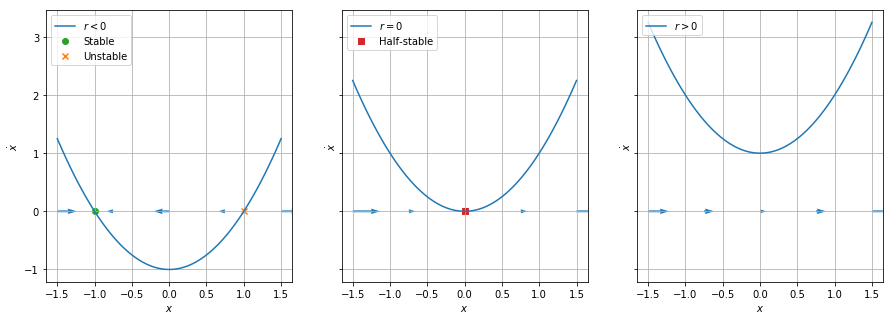

In [83]:
def f(x, r):
    y = r + x**2
    return y

x = np.linspace(-1.5, 1.5, 100)
x_flow = np.linspace(-1.5, 1.5, 5)

fig, axes = plt.subplots(ncols=3, sharey=True, figsize=(15, 5))

labels = np.array([r'$r<0$', r'$r=0$', r'$r>0$'])
rs = np.array([-1, 0, 1])

for ax, label, r in zip(axes, labels, rs):
    ax.plot(x, f(x, r), label=label)
    ax.quiver(x_flow, 0, f(x_flow, r), 0, color=c[0])
    ax.set(xlabel=r'$x$', ylabel=r'$\dot{x}$')
    ax.grid(True)
    
    if r < 0:
        ax.scatter(- np.sqrt(- r), f(-np.sqrt(- r), r), label='Stable', c=c[2], marker=m[0])
        ax.scatter(np.sqrt(- r), f(-np.sqrt(- r), r), label='Unstable', c=c[1], marker=m[1])
    elif r == 0:
        ax.scatter(0, f(0, 0), label='Half-stable', c=c[3], marker=m[2])
        
    ax.legend(loc='upper left')
    
    
plt.show()

### Graphical Conventions

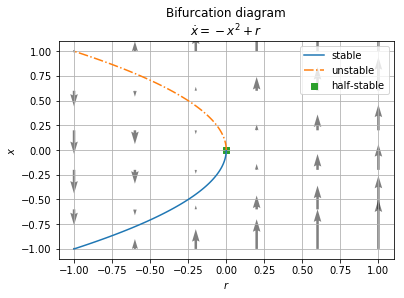

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def f(x, r):
    y = - x**2 + r
    return y

def g(x, r):
    y = x**2 + r
    return y

x = np.linspace(-1, 0, 100)
y = f(x, 0)
plt.plot(y, x, label='stable')

x = np.linspace(0, 1, 100)
y = f(x, 0)
plt.plot(y, x, label='unstable', linestyle='-.')

X, Y = np.meshgrid(np.arange(-1, 1.2, 0.4), np.arange(-1, 1.2, 0.4))
# U, V = np.meshgrid(X, Y)
plt.quiver(Y, X, np.repeat(0, len(X)*len(Y)), g(X, Y), alpha=.5)

plt.scatter(0, 0, marker='s', label='half-stable', color='#2ca02c')

plt.title('Bifurcation diagram\n' r'$\dot{x} = - x^2 + r$')
plt.xlabel(r'$r$')
plt.ylabel(r'$x$')
plt.legend(loc='best')
plt.grid(True)

plt.show()

### Terminology

Saddle-node bifurcation 
aka, **Fold bifurcation**, **Tuning-point bifurcation**, **Blue sky bifurcation**

### Exmaple 3.1.1

linear stability analysis of fixed point: $\dot{x} = f(x) = r - x^2$

### Example 3.1.2

$$\dot{x} = r - x - e^{-x}$$

**Solution:**


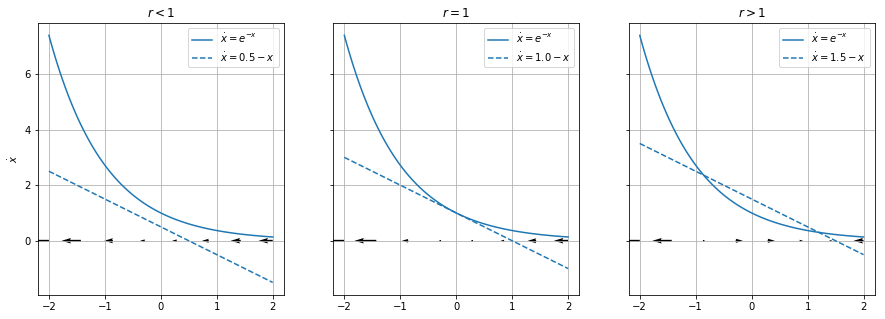

In [93]:
def f_1(x):
    y = np.exp(-x)
    return y

def f_2(x, r):
    y = r - x
    return y

def f(x, r):
    x_ = f_2(x, r) - f_1(x)
    return x_

rs = np.linspace(0.5, 1.5, 3)
x = np.linspace(-2, 2, 100)
x_flow = np.linspace(-2, 2, 8)
titles = np.array([r'$r < 1$', r'$r = 1$', r'$r > 1$'])

# fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, sharey=True)
fig, axes = plt.subplots(ncols=3, sharey=True, figsize=(15, 5))

for ax, r, title in zip(axes, rs, titles):
    ax.plot(x, f_1(x), label=r'$\dot{x} = e^{-x}$', c=c[0])
    ax.plot(x, f_2(x, r), label = (r'$\dot{x} = %.1f - x$' % r), linestyle=l[1], c=c[0])
    ax.quiver(x_flow, 0, f(x_flow, r), 0)
    ax.legend(loc='upper right')
    ax.set(title=title)
    ax.grid(True)

axes[0].set(ylabel=r'$\dot{x}$')
# axes[1].title(r'$\dot{x} = r - x - e^{-x}$')
plt.show()

### Normal Forms

$$\begin{align*}
\dot{x} 
&= r - x - e^{-x} \\
&= r - x - [1 - x + \frac{x^2}{2!} + \cdots] \\
&= (r - 1) - \frac{x^2}{2} + \cdots 
\end{align*}$$

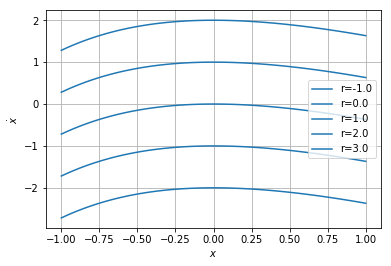

In [8]:
def f(x, r):
    y = r - x - np.exp(-x)
    return y

x = np.linspace(-1, 1, 100)
rs = np.linspace(-1, 3, 5)

for r in zip(rs):
    plt.plot(x, f(x, r), label=('r=%.1f' % r), c=c[0])
    #plt.scatter()

plt.grid(True)
plt.xlabel(r'$x$')
plt.ylabel(r'$\dot{x}$')
plt.legend(loc='best')
plt.show()

## 3.2 Transcritical Bifurcation
---

$$\dot{x} = rx - x^2$$
(1)


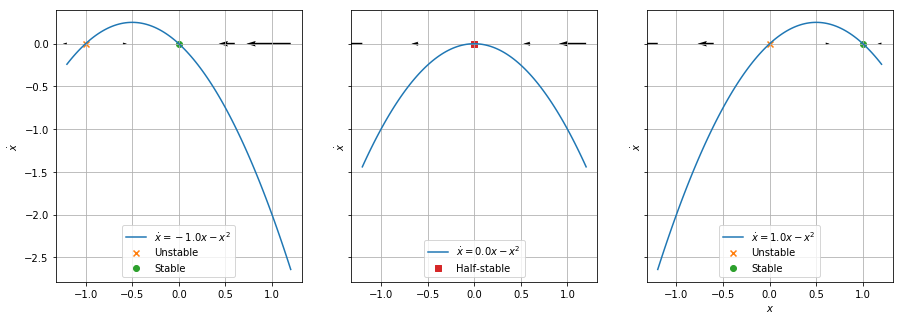

In [81]:
def f(x, r):
    y = r*x - x**2
    return y

x = np.linspace(-1.2, 1.2, 100)
r = np.linspace(-1, 1, 3)
x_flow = np.linspace(-1.2, 1.2, 5)

fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(15, 5))

for ax, r in zip(axes, rs):
    ax.plot(x, f(x, r), label=(r'$\dot{x} = %.1f x - x^2$' % r))
    ax.quiver(x_flow, 0, f(x_flow, r), 0)
    if r > 0:
        ax.scatter(0, 0, label='Unstable', c=c[1], marker=m[1])
        ax.scatter(r, 0, label='Stable', c=c[2], marker=m[0])
    if r < 0:
        ax.scatter(r, 0, label='Unstable', c=c[1], marker=m[1])
        ax.scatter(0, 0, label='Stable', c=c[2], marker=m[0])
    if r == 0:
        ax.scatter(0, 0, label='Half-stable', c=c[3], marker=m[2])
            
    ax.set(ylabel=r'$\dot{x}$')
    ax.grid(True)
    ax.legend(loc='lower center')
    
axes[2].set(xlabel=r'$x$')
plt.show()

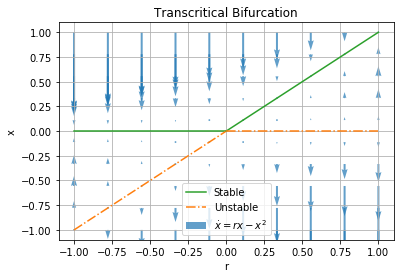

In [112]:
def stable(r):
    if r < 0:
        x = 0
    elif r >= 0:
        x = r
        
    return x

def unstable(r):
    if r < 0:
        x = r
    elif r >= 0:
        x = 0
    return x

def f(r):
    x = r
    return x
def g(r):
    x = 0
    return x

def F(x, r):
    y = r*x - x**2
    return y
    

r_neg = np.linspace(-1, 0, 100)
r_pos = np.linspace(0, 1, 100)


# plt.plot(r, stable(r), linestyle=l[0], c=c[2], label='Stable')
# plt.plot(r, unstable(r), linestyle=l[2], c=c[1], label='Unstable')

plt.plot(r_neg, np.repeat(0, len(r_neg)), linestyle=l[0], c=c[2])
plt.plot(r_neg, f(r_neg), linestyle=l[2], c=c[1])

plt.plot(r_pos, f(r_pos), linestyle=l[0], c=c[2], label='Stable')
plt.plot(r_pos, np.repeat(0, len(r_pos)), linestyle=l[2], c=c[1], label='Unstable')

x, r = np.linspace(-1, 1, 10), np.linspace(-1, 1, 10)
x, r = np.meshgrid(x, r)
plt.quiver(r, x, 0, F(x, r), color=c[0], alpha=.7, label=r'$\dot{x}=rx-x^2$')

plt.title('Transcritical Bifurcation')
plt.xlabel(r'r')
plt.ylabel(r'x')
plt.grid(True)
plt.legend(loc='best')

plt.show()

### Example 3.2.1

$$\dot{x} = x(1-x^2) - a(1-e^{-bx})$$

**Solution:**

for small x $dx$
$$
\begin{align*}
1 - e^{-bx} 
&= 1 - [1 - bx + \frac{1}{2}b^2x^2 + O(x^3)] \\
&= bx - \frac{1}{2} b^2x^2 + O(x^3)
\end{align*}
$$

substitute: $1 - e^{-bx}$
$$
\begin{align*}
\dot{x}
&= x - a(bx - \frac{1}{2}b^2x^2) + O(x^3) \\
&= (1 - ab)x + (\frac{1}{2}ab^2) x^2 + O(x^3)
\end{align*}
$$

fixed point $x*$:
$$x* \approx \frac{2(ab -1)}{ab^2}$$

### Example 3.2.2

Analyze: 
$$\dot{x} = r \ln x + x -1$$ 
near $x=1$

find $X$, $R$, approximate form 
$$\dot{X} \approx RX - X^2$$

**Solution:**

fixe point: $x=1$ 

introduce new var: $u = x -1$

$$
\begin{align*}
\dot{u} 
&= \dot{x} \\
&= r \ln (1+u) + u \\
&= r \Big[ u - \frac{1}{2}u^2 + O(u^3) \Big] + u \\
&\approx (r + 1) u - \frac{1}{2}ru^2 + O(u^3) 
\end{align*}
$$

Let $u = av$

$$\dot{v} = (r+1)v - (\frac{1}{2}ra)v^2 + O(v^3)$$

if choose $a = \frac{2}{r}$

$$\dot{v} = (r+1)v - v^2 + O(v^3)$$

Let $R = r+1$, $X = v$

$$X = v = \frac{u}{a} = \frac{1}{2} r(x-1)$$

## 3.3 Laser Threshold

### Physical Background

solid-state laser

### Model

$n(t)$: \# of photons 

$$\begin{align*}
\dot{n} 
&= \text{gain} - \text{loss} \\
&= Gn N - kn
\end{align*}$$

- $N(t)$: \# of excited atoms
- $G (>0)$: gain coef
- $k (>0)$: rate constant; 
- $\tau = \frac{1}{k}$: lifetime of photon in laser

$$N(t) = N_0 - \alpha n$$
- $\alpha$: rate at which atoms drop back to graund state

Substitute: 
$$
\begin{align*}
\dot{n} &= Gn(N_0 - \alpha n) - kn \\
&= (GN_0 - k) n - \alpha G n^2
\end{align*}
$$

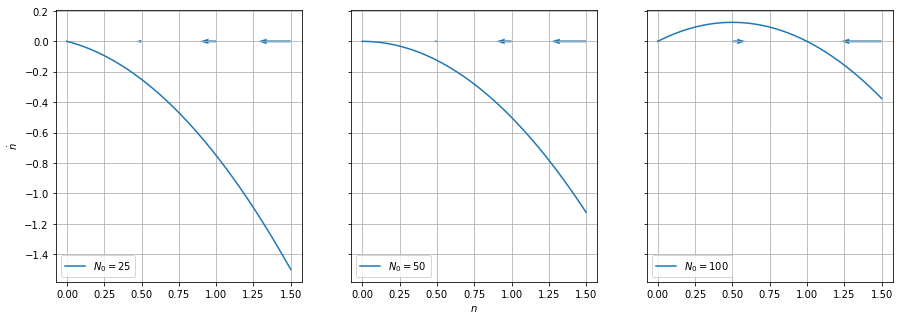

In [103]:
def f(n, N_0, G, k, alpha):
    n_dot = (G * N_0 - k)* n - alpha * G * n**2
    
    return n_dot

N_0s = np.array([25, 50, 100])
G = 0.01
k = 0.5
alpha = 50

fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(15, 5))
n = np.linspace(0, 1.5, 100)
n_flow = np.linspace(0, 1.5, 4)

for ax, N_0 in zip(axes, N_0s):
    n_dot = f(n, N_0, G, k, alpha)
    n_dot_flow = f(n_flow, N_0, G, k, alpha)
    
    ax.plot(n, n_dot, label=(r'$N_0 = %d $' % N_0))
    ax.quiver(n_flow, 0, n_dot_flow, 0, color=c[0])
    ax.legend(loc='lower left')
    ax.grid(True)
    
axes[0].set(ylabel=r'$\dot{n}$')
axes[1].set(xlabel=r'$n$')
plt.show()

In [ ]:
def f(N_0):
    

## 3.4 Pitchfork Bifurcation
---

Pitchfork bifurcation:
- **Supercritical** bifurcation

### Supercritical Pitchfork Bifurcation

$$\dot{x} = rx - x^3$$
(1)

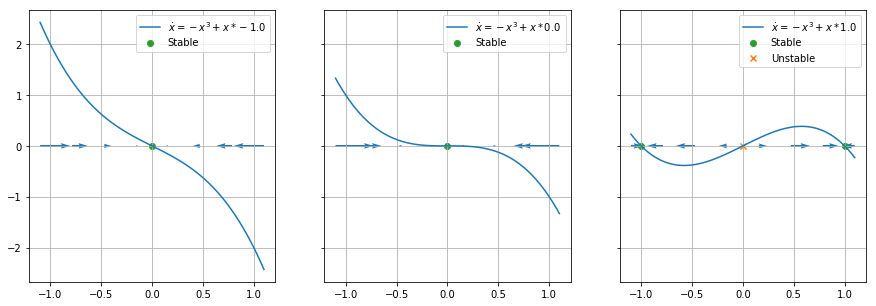

In [102]:
def f(x, r):
    y = - x**3 + x*r
    return y

x = np.linspace(-1.1, 1.1, 100)
x_flow = np.linspace(-1.1, 1.1, 8)
rs = np.array([-1, 0, 1])


fig, axes = plt.subplots(ncols=3, sharey=True, sharex=True, figsize=(15, 5))

for ax, r in zip(axes, rs):
    ax.plot(x, f(x, r), label=(r'$\dot{x} = - x^3 + x * %.1f$' % r))
    ax.quiver(x_flow, 0, f(x_flow, r), 0, color=c[0])
    
    if r <= 0:
        ax.scatter(0, 0, c=c[2], marker=m[0], label='Stable')
    if r >  0:
        ax.scatter(np.sqrt(r), 0, c=c[2], marker=m[0], label='Stable')
        ax.scatter(- np.sqrt(r), 0, c=c[2], marker=m[0])
        ax.scatter(0, 0, c=c[1], marker=m[1], label='Unstable')
    
    ax.grid(True)
    ax.legend(loc='best')

plt.show()

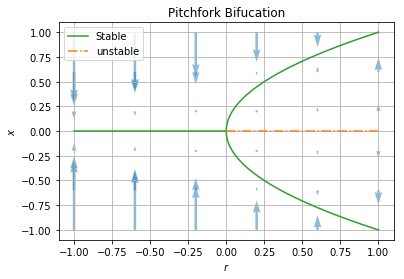

In [39]:
def f(x, r):
    y = - x**3 + x*r
    return y

# def fixed(x):
#     if x == 0:
#         r = 0
#     elif x != 0:
#         r = x**2
    
#     return r


X, Y = np.meshgrid(np.arange(-1, 1.1, 0.4), np.arange(-1, 1.1, 0.4))

plt.quiver(Y, X, np.repeat(0, len(X)*len(Y)), f(X, Y), color=c[0], alpha=0.5)

x = np.linspace(-1, 1, 100)

plt.plot(x**2, x, label='Stable', c=c[2])

r = np.linspace(0, 1, 100)

plt.plot(-r, np.repeat(0, len(r)), label='Stable', color=c[2])
plt.plot(r, np.repeat(0, len(r)), label='unstable', color=c[1], linestyle=l[2])

plt.title('Pitchfork Bifucation')
plt.xlabel(r'$r$')
plt.ylabel(r'$x$')
plt.grid(True)
plt.legend(loc='best')

plt.show()

### Exmaple 3.4.1

$$\dot{x} = - x + \beta \tanh x$$



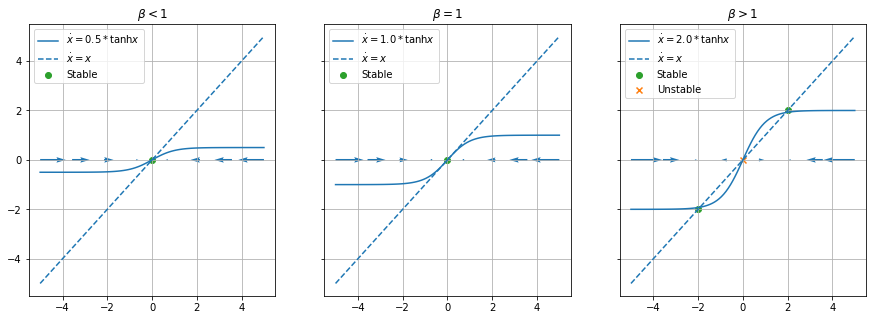

In [101]:
def f_1(x, beta):
    y = beta * np.tanh(x)
    return y

def f_2(x):
    y = x
    return y

def f(x, beta):
    y = f_1(x, beta)- f_2(x)
    return y

x = np.linspace(-5, 5, 100)
flow = np.linspace(-5, 5, 8)
betas = np.array([0.5, 1, 2])
labels = np.array([r'$\beta<1$', r'$\beta=1$', r'$\beta>1$'])
fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(15, 5))

for ax, beta, label in zip(axes, betas, labels):
    ax.plot(x, f_1(x, beta), label=(r'$\dot{x}=%.1f * \tanh x$' % beta), c=c[0], linestyle=l[0])
    ax.plot(x, f_2(x), label=r'$\dot{x}=x$', c=c[0], linestyle=l[1])
    ax.quiver(flow, 0, f(flow, beta), 0, color=c[0])
    
    if beta <= 1:
        ax.scatter(0, 0, marker=m[0], c=c[2], label='Stable')
    elif beta > 1:
        ax.scatter(-2, -2, marker=m[0], c=c[2], label='Stable')
        ax.scatter(2, 2, marker=m[0], c=c[2])
        ax.scatter(0, 0, marker=m[1], c=c[1], label='Unstable')
    
    ax.legend(loc='best')
    ax.set(title=label)
    ax.grid(True)

# plt.plot(x, f(x, 2))


plt.show()

In [ ]:
def f_1(x, beta):
    y = beta * np.tanh(x)
    return y

def f_2(x):
    y = x
    return y

def f(x, beta):
    y = f_1(x, beta)- f_2(x)
    return y



## 3.6 Imperfect Bifurcation and Catastrophes
---

$$\dot{x} = h + rx + x^3$$

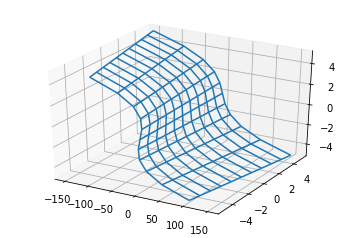

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def fixed(x, r):
    h = - r*x - x**3
    return h

x, r = np.arange(-5, 5.01, 1), np.arange(-5, 5.01, 1)
x, r = np.meshgrid(x, r)
h = fixed(x, r)

fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.plot_surface(h, r, x)
ax.plot_wireframe(h, r, x)

# Axes3D.plot_wireframe(X, Y, Z)
plt.show()

# print(X)
# print(Y)
# print(Z)

---
**Overview**

- [3.0 Introduction](#3.0-Introduction)
- [3.1 Saddle-Node Bifurcation](#3.1-Saddle-Node-Bifurcation)
    - [Graphical Conventions](#Graphical-Conventions)
    - [Terminology](#Terminology)
    - [Exmaple 3.1.1](#Exmaple-3.1.1)
    - [Normal Forms](#Normal-Forms)
- [3.2 Transcritical Bifurcation](#3.2-Transcritical-Bifurcation)
    - [Example 3.2.1](#Example-3.2.1)
    - [Example 3.2.2](#Example-3.2.2)
- [3.3 Laser Threshold](#3.3-Laser-Threshold)
    - [Physical Background](#Physical-Background)
    - [Model](#Model)
- [3.4 Pitchfolk Bifurcation](#3.4-Pitchfolk-Bifurcation)
    - [Supercritical Pitchfork Bifurcation](#Supercritical Pitchfork Bifurcation)
    - [Exmaple 3.4.1](#Exmaple-3.4.1)
- [3.5 Overdamped Bead on a Rotating Hoop](#3.5-Overdamped-Bead-on-a-Rotating-Hoop)
- [3.6 Imperfect Bifurcation and Catastrophes](#3.6-Imperfect-Bifurcation-and-Catastrophes)
- [3.7 Insect Outbreak](#3.7-Insect-Outbreak)